## Сверточные нейронные сети: анализ изображений

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Нормализуем пиксели изображений, приводя их значения к диапазону [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Преобразование меток классов в категориальные (one-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Выводим форму (размерность) загруженных данных
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [2]:
# Создание модели CNN
model = models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    # Первый сверточный слой (Conv2D) с 32 фильтрами, ядром 3x3, функцией активации ReLU и padding=same
    # padding='same' сохраняет размерность выхода
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Слой MaxPooling2D для уменьшения размерности и выделения более общих признаков
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Слой Flatten для преобразования многомерного выхода в одномерный вектор
    layers.Flatten(),
    # Полносвязный слой (Dense) с 128 нейронами и функцией активации ReLU
    layers.Dense(128, activation='relu'),
    # Выходной полносвязный слой с 10 нейронами (по количеству классов) и softmax
    # softmax обеспечивает вывод вероятностей для каждого класса
    layers.Dense(10, activation='softmax')
])

# Компилируем модель, указывая оптимизатор, функцию потерь и метрику
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
# Обучение модели
history = model.fit(train_images, train_labels, epochs=6, batch_size=32, validation_split=0.1)

Epoch 1/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.3886 - loss: 1.6630 - val_accuracy: 0.6208 - val_loss: 1.0953
Epoch 2/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.6431 - loss: 1.0154 - val_accuracy: 0.7100 - val_loss: 0.8592
Epoch 3/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 184s 90ms/step - accuracy: 0.7169 - loss: 0.8042 - val_accuracy: 0.7252 - val_loss: 0.8050
Epoch 4/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 113s 79ms/step - accuracy: 0.7618 - loss: 0.6865 - val_accuracy: 0.7402 - val_loss: 0.7603
Epoch 5/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.7961 - loss: 0.5829 - val_accuracy: 0.7570 - val_loss: 0.7514
Epoch 6/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 97s 69ms/step - accuracy: 0.8289 - loss: 0.4864 - val_accuracy: 0.7590 - val_loss: 0.7577


313/313 - 5s - 16ms/step - accuracy: 0.7379 - loss: 0.8263
Точность на тестовых данных: 0.7379000186920166


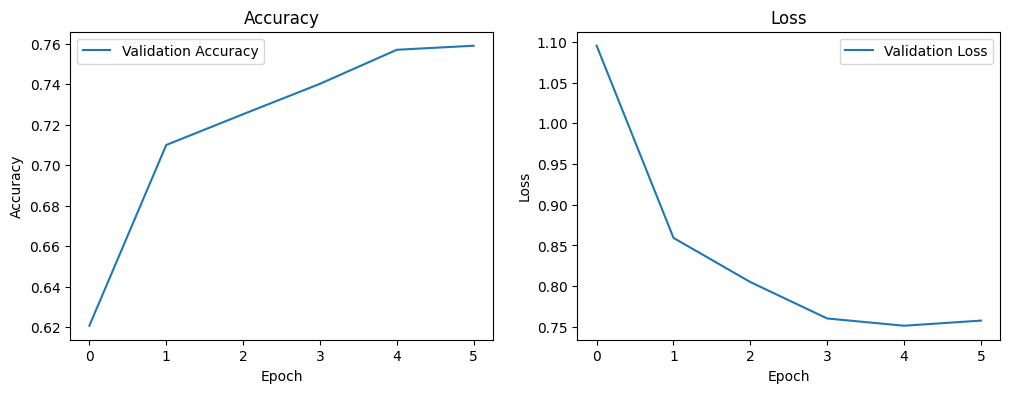

In [4]:
# Оценка точности на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_acc}")

# Построение графика обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()